In [12]:
import pandas as pd
import xlwings as xw
#可以先將"..."改成0再把需要改成float型態的欄位切片並用astype(float)方法改變再貼回原本的df
def justify(x):
    if x == '…':
        return 0
    else:
        try:
            return float(x)
        except:
            return x
wb = xw.Book(r"C:\Users\j3192\Downloads\df720b0415d666fd8632336bc28ce2a0_export.xlsx")
sheet = wb.sheets['Sheet1']
df = sheet.range('A1').options(pd.DataFrame, expand = 'table').value
df = df.applymap(justify)
df

# 整理資料

df.drop(index = '統計年', inplace = True)

In [13]:
def cut(x):
    if type(x) == str:
        return x[:2]
    else:
        return x
df = df.applymap(cut)
df.set_index('site_id', inplace = True)
df

,people_total,area,population_density
site_id,,,
新北,551480.0,23.1373,23835.0
新北,387484.0,16.3170,23747.0
新北,413590.0,20.1440,20532.0
新北,222585.0,5.7138,38956.0
新北,416524.0,19.7383,21102.0
...,...,...,...
連江,2360.0,9.9000,238.0
連江,1624.0,4.7000,346.0
連江,1352.0,3.8000,356.0


In [14]:
new_df = df.groupby('site_id').sum()
new_df['population_density'] = new_df['people_total'] / new_df['area']
new_df.sort_values('population_density', ascending = False, inplace = True)
new_df

,people_total,area,population_density
site_id,,,
臺北,2683257.0,271.7997,9872.185289
基隆,371458.0,132.7589,2797.989438
新北,3986689.0,2052.5667,1942.294494
桃園,2188017.0,1220.9540,1792.055229
臺中,2787070.0,2214.8968,1258.329508
彰化,1282458.0,1074.3960,1193.654854
高雄,2776912.0,2951.8524,940.735384
金門,137456.0,151.6560,906.367041
臺南,1886522.0,2191.6531,860.775823


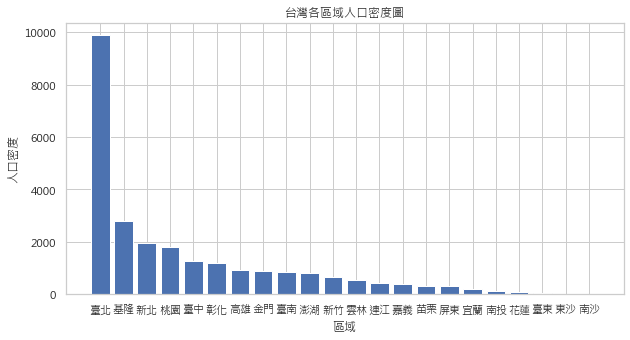

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
plt.figure(num = 1, figsize=(10, 5))#改變圖的大小
plt.bar(new_df.index, new_df.population_density) 
plt.xlabel('區域')
plt.ylabel('人口密度')
plt.title('台灣各區域人口密度圖')
plt.show()